In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
data = loadmat('KmeansData.mat')

## （1） 可视化

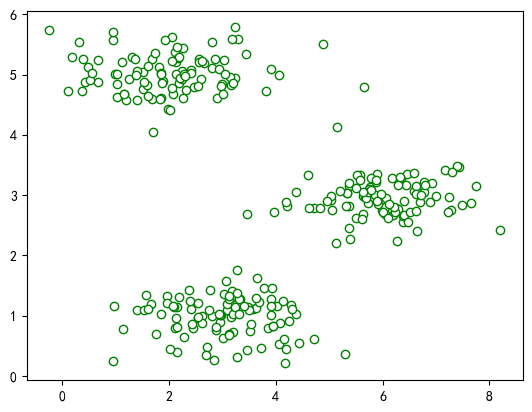

In [3]:
X = data['X']
x = X[:, 0]
y = X[:, 1]

plt.scatter(x, y, marker='o', edgecolor='green', facecolor='white')

## （2） 聚类

In [4]:
def clustering(K, centriod0, X):
    distance = [[np.linalg.norm(X[l]-centriod0[k]) for k in range(K)] for l in range(len(X))]
    distance = np.array(distance)
    centriod_closest = np.argmin(distance, axis=1)
    return centriod_closest

In [5]:
def centriods(X, centriod_closest, K):
    centriod = []
    for k in range(K):
        index = np.where(centriod_closest==k)[0]
        miu = np.mean(X[index], axis=0)
        centriod.append(miu) 
    return np.array(centriod)

In [6]:
# 数据集
X = data['X']

# 初始化聚类中心
centriod = np.array([[3, 3],
                      [6, 2],
                      [8, 5]])

# 迭代次数为10
iteration = 10

# 分成3类
K = 3

miu = []
for i in range(iteration):
    miu.append(centriod)
    centriod_closest = clustering(K, centriod, X)
    centriod = centriods(X, centriod_closest, K)
miu = np.array(miu)

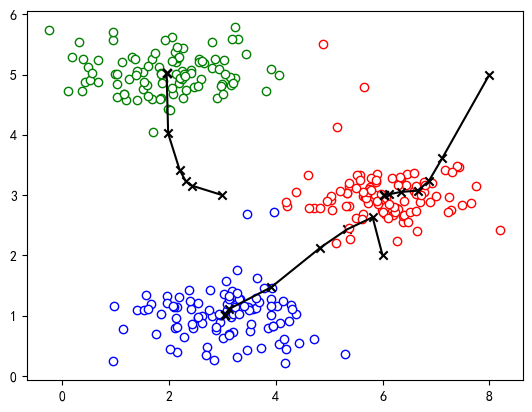

In [7]:
# 可视化
color = ['green','blue', 'red']
for i in range(K):
    plt.scatter(X[np.where(centriod_closest==i)[0], 0], X[np.where(centriod_closest==i)[0], 1], marker='o', edgecolor=color[i], facecolor='white')
    plt.plot(miu[:, i, 0], miu[:, i, 1], color='black')
    plt.scatter(miu[:, i, 0], miu[:, i, 1], marker='x', color='black')